In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression 

raw_data = load_breast_cancer()
data_features = pd.DataFrame(
    np.hstack([raw_data['data'], raw_data['target'].reshape(-1, 1)]),
    columns=raw_data['feature_names'].tolist() + ['benign']
)
data_features.head()

X = raw_data['data']
y = raw_data['target']

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate


In [4]:
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.3,random_state=0)
data_splits = list(sss.split(X,y))

train_acc   = []
test_acc    = []
param_range =  np.logspace(np.log10(5),np.log10(500),20).astype(int)

for i in param_range:
    model = RandomForestClassifier(n_estimators = i)
    
    scores = cross_validate(model,X,y,cv=sss,return_train_score=True)
    train_acc.append(np.mean(scores["train_score"]))
    test_acc.append(np.mean(scores["test_score"]))

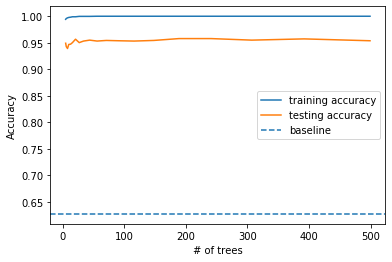

<Figure size 432x288 with 0 Axes>

In [9]:
from matplotlib import pyplot as plt
plt.plot(param_range, train_acc, label="training accuracy")
plt.plot(param_range, test_acc, label="testing accuracy")
plt.axhline(sum(y) / len(y), ls="--", label="baseline")
#plt.ylim(0.81, 0.9)
plt.xlabel("# of trees")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import umap

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

In [47]:
def my_pca(X,y,std,string,string1):
    if std in ["ja","Ja","Yes","yes"]:
        X = StandardScaler().fit_transform(X)
        print("Standardiserer")
    else:
        print("Standardiserer ikke")
    
    X_PCA = PCA().fit_transform(X,y)[:,:2]
    fig, ax = plt.subplots()
    plt.title(string + ' PCA')
    scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Digits")
    if string1 in ["ja","Ja","Yes","yes"]:
    #    fig.savefig(string + "_PCA.png")
    
    X_LDA = LDA(n_components=2).fit_transform(X,y)
    fig, ax = plt.subplots()
    plt.title(string + ' LDA')
    scatter = ax.scatter(X_LDA[:, 0], X_LDA[:, 1], c=y)
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Digits")
    if string1 in ["ja","Ja","Yes","yes"]:
    #    fig.savefig(string + "_LDA.png")
    
    X_TSNE = TSNE(random_state=0).fit_transform(X,y)
    fig, ax = plt.subplots()
    plt.title(string + ' t-SNE')
    scatter = ax.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=y)
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Digits")
    if string1 in ["ja","Ja","Yes","yes"]:
    #    fig.savefig(string + "_TSNE.png")
    
    X_UMAP = umap.UMAP(random_state=0).fit_transform(X,y)
    fig, ax = plt.subplots()
    plt.title(string + ' UMAP')
    scatter = ax.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=y)
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Digits")
    if string1 in ["ja","Ja","Yes","yes"]:
    #    fig.savefig(string + "_UMAP.png")

Standardiserer ikke
Standardiserer


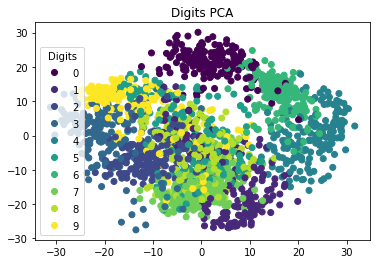

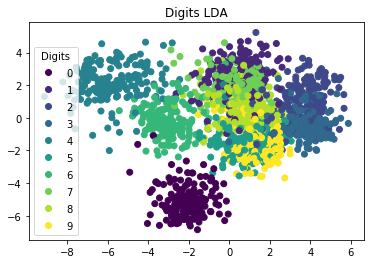

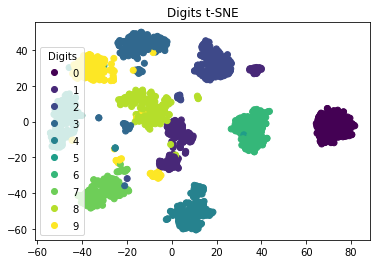

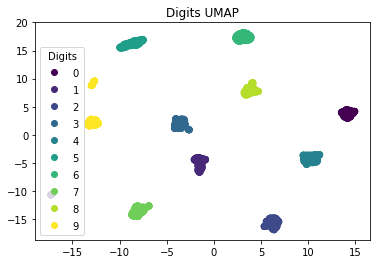

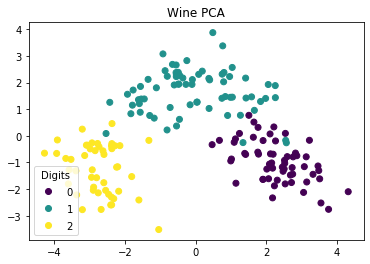

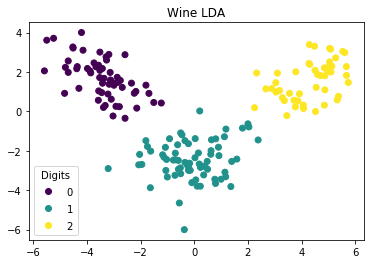

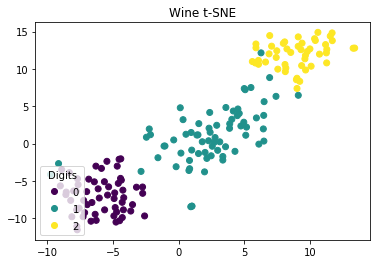

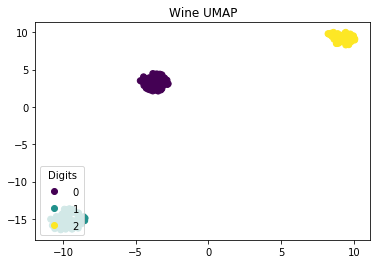

In [17]:
#Digits below:
my_pca(X_digits,y_digits,"nej","Digits","yes")

#Wine below:
my_pca(X_wine,y_wine,"yes","Wine","yes")

Standardiserer


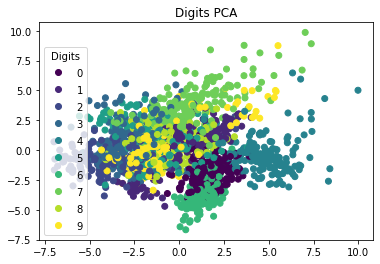

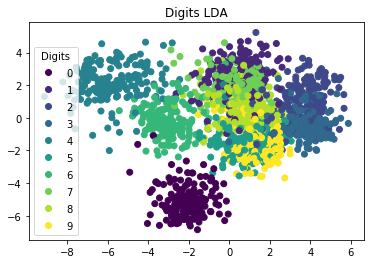

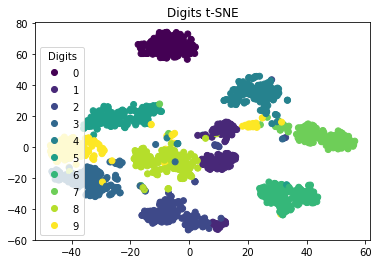

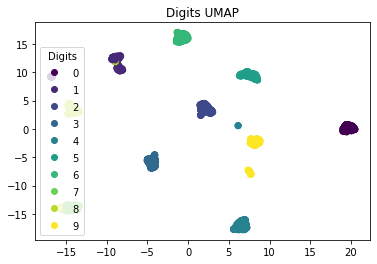

In [52]:
my_pca(X_digits,y_digits,"yes","Digits","asdasd")

Standardiserer


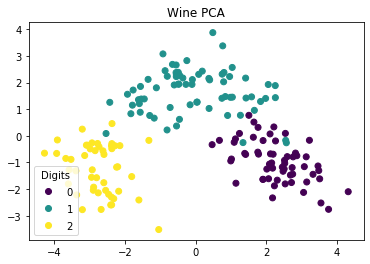

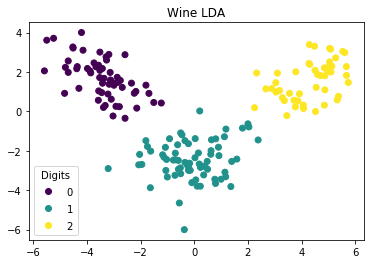

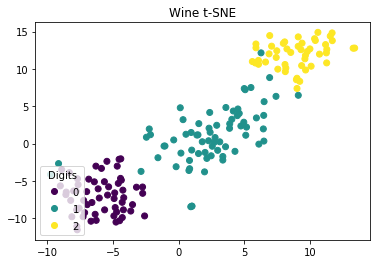

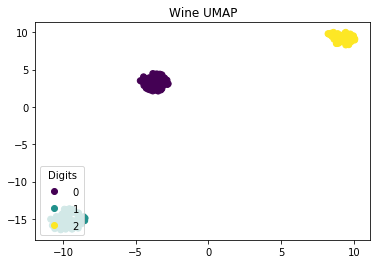

In [19]:
my_pca(X_wine,y_wine,"yes","Wine","asdasd")

Standardiserer ikke


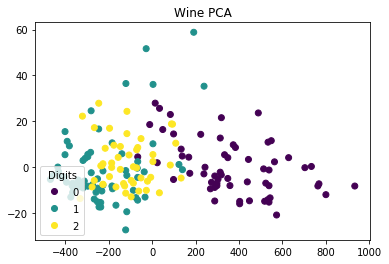

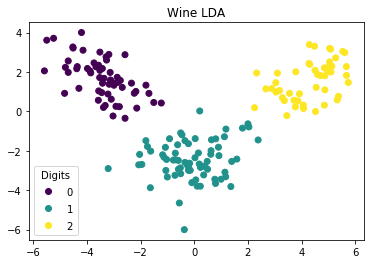

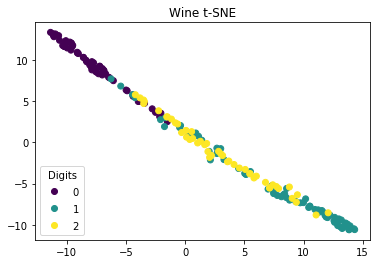

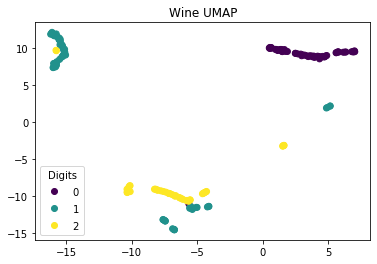

In [48]:
my_pca(X_wine,y_wine,"no","Wine","asdasd")